<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning 
* Understanding Data Visualization

### Data Analytics of Airbnb Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

YOu can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price,avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [1]:
## Read the csv file
import numpy as np
import seaborn as sns
import seaborn.objects as so
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

data = pd.read_csv("Airbnb_Open_Data.csv")
len(data.index)


C:\Users\david\AppData\Local\Temp\ipykernel_10164\1655385940.py:9: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Airbnb_Open_Data.csv")


102599

In [2]:
## Display the first 5 rows

data.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
## Display the data types
data.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset. 
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [4]:

data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
def remove_columns(data,columns):
    for column in columns:
        data = data.drop(columns=column)
    return data

columns_to_remove = ["host id","id","country","country code"]
data =remove_columns(data, columns_to_remove)

In [6]:
data.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'house_rules',
       'license'],
      dtype='object')

## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [7]:
## Check for missing values in the dataframe and display the count in ascending order.
data_is_Null = data.isnull()
data_is_Null = data_is_Null.loc[:, data_is_Null.any()].sum()
data_is_Null_sorted = data_is_Null.sort_values(ascending=True)
print (data_is_Null_sorted)
data = data.fillna('')





lat                                    8
long                                   8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
number of reviews                    183
Construction year                    214
price                                247
NAME                                 250
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            406
minimum nights                       409
availability 365                     448
reviews per month                  15879
last review                        15893
house_rules                        52131
license                           102597
dtype: int64


In [8]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
print(data.duplicated().sum())
data = data.drop_duplicates()


3436


In [9]:
## Display the total number of records in the dataframe after removing the duplicates.
len(data.index)

99163

## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [10]:
## Rename the column.
data.rename(columns = {"availability 365":'days_booked'}, inplace = True)

In [11]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
for column_name in data.columns:
    data.rename(columns = {column_name:column_name.lower()}, inplace = True)
    data.rename(columns = {column_name:column_name.replace(" ","_")}, inplace = True)
    data.rename(columns = {column_name:column_name.replace(" ","_")}, inplace = True)
data

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,
2,THE VILLAGE OF HARLEM....NEW YORK !,,Elise,Manhattan,Harlem,40.80902,-73.9419,True,flexible,Private room,...,$124,3.0,0.0,,,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",
3,,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,,
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,...,$41,10.0,9.0,11/19/2018,0.1,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,Cozy bright room near Prospect Park,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,True,moderate,Private room,...,,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,
102054,Private Bedroom with Amazing Rooftop View,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,False,flexible,Private room,...,,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,
102055,Pretty Brooklyn One-Bedroom for 2 to 4 people,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.6781,-73.90822,True,moderate,Entire home/apt,...,,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,
102056,Room & private bathroom in historic Harlem,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,True,strict,Private room,...,,2.0,0.0,,,1.0,1.0,0.0,Each of us is working and/or going to school a...,


In [12]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
data["service_fee"] = data["service_fee"].str.replace('$', '')
data["price"] = data["price"].str.replace('$', '')
data["price"] = data["price"].str.replace(',', '.')

to_numeric = ["service_fee","price","long","lat","reviews_per_month","minimum_nights","review_rate_number","calculated_host_listings_count","days_booked"]

for i in to_numeric:
    data[i] = pd.to_numeric(data[i])





### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [13]:
## List the count of various room types avaliable with Airbnb
data["room_type"].value_counts()




room_type
Entire home/apt    52003
Private room       44895
Shared room         2150
Hotel room           115
Name: count, dtype: int64

<Axes: xlabel='cancellation_policy', ylabel='Density'>

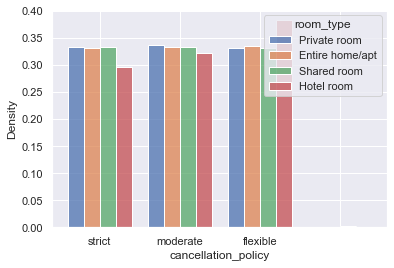

In [14]:
## Which room type adheres to more strict cancellation policy

sns.set_theme()

x,y = 'room_type', 'cancellation_policy'
sns.histplot(x = data[y], hue=data[x], multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False)

# private room seams to have most strict policy on average


<Axes: xlabel='price', ylabel='neighbourhood_group'>

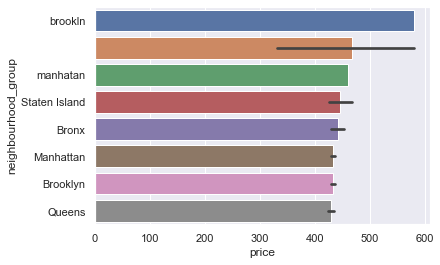

In [15]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals

x,y = 'neighbourhood_group', 'price'
sns.barplot(data=data, x=y, y=x ,order=data.groupby([x])[y].mean().sort_values(ascending=False).index)

#from this graph we can see that Brooklin is the most expensive

## Task 5a: Data Visualization (Any Tool)

- Create a horizontal bar chart to display the top 10 most expensive neighborhoods in the dataset.
    - Create another chart with the 10 cheapest neighborhoods in the dataset.
- Create a box and whisker chart that showcases the price distribution of all listings split by room type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

<Axes: xlabel='price', ylabel='neighbourhood'>

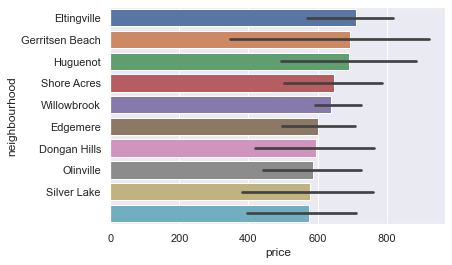

In [16]:

x,y = 'neighbourhood', 'price'
sns.barplot(data=data, x=y, y=x,order=data.groupby([x])[y].mean().sort_values(ascending=False)[:10].index)

<Axes: xlabel='price', ylabel='neighbourhood'>

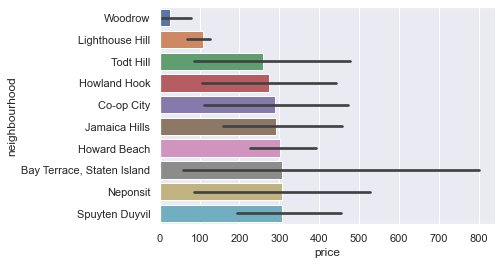

In [17]:
sns.barplot(data=data, x=y, y=x,order=data.groupby([x])[y].mean().sort_values(ascending=True)[3:13].index)

<Axes: xlabel='price', ylabel='room_type'>

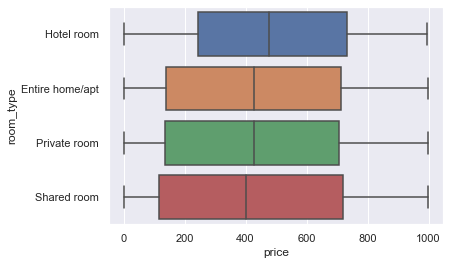

In [18]:
x,y = 'room_type', 'price'
sns.boxplot(data=data, x=y, y=x,order=data.groupby([x])[y].mean().sort_values(ascending=False).index)

## Task 5b: Data Visualization (Any Tool)

- Create a scatter plot to illustrate the relationshi between the cleaning fee and the room price and write down the kind of correlation, if any, that you see.
- Create a line chart to showcase the total amount of listings available per year.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

<Axes: xlabel='service_fee', ylabel='price'>

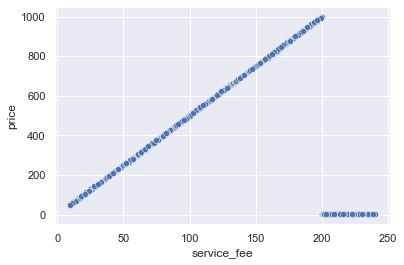

In [19]:
x,y = "service_fee", "price"
sns.scatterplot(data=data,x=x, y=y)

#seems like perfect linear postitive correlation

<Axes: xlabel='construction year', ylabel='calculated_host_listings_count'>

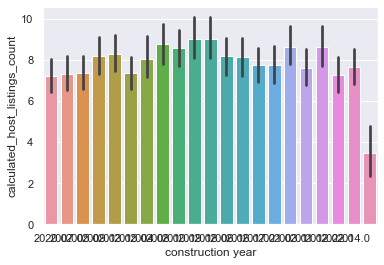

In [20]:


x,y = "construction year","calculated_host_listings_count"
sns.barplot(data=data, x=x, y=y)



## Task 5c: Data Visualization (Any Tool)

- Create a data visualization of your choosing using one of the review columns in isolation or in combination with another column.
- Create a visualization to compare at least two different variables between super hosts and regular hosts.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

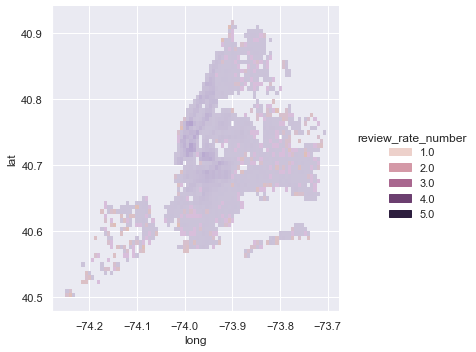

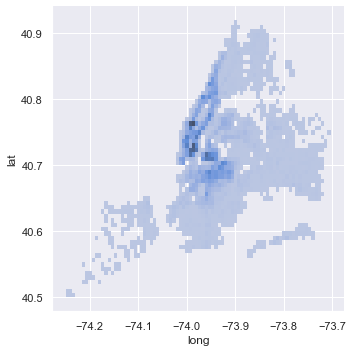

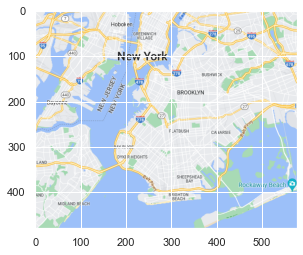

In [21]:
x,y = "long", "lat"


resolution = 150
sns.displot(x=x, y=y, hue="review_rate_number", data=data, binwidth=(1/resolution, 1/resolution))
plt.show()


resolution = 150
sns.displot(x=x, y=y, data=data, binwidth=(1/resolution, 1/resolution))
plt.show()



image = Image.open("Capture.PNG")
imgplot = plt.imshow(image)
plt.show()


# the rating map is almost perfectly same as the density map, interesting!

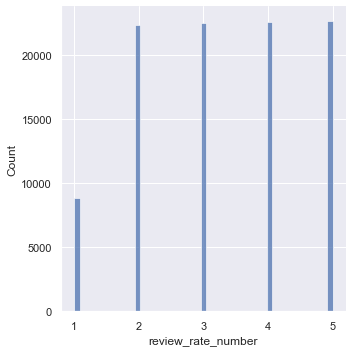

In [22]:
x = "review_rate_number"
sns.displot(x=x, data=data)
#distribution of ratings

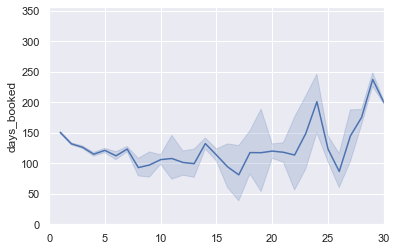

In [36]:
days_cant_be_negative = []

for minimum_nights in data["minimum_nights"]:
    if minimum_nights >= 0:
        days_cant_be_negative.append(minimum_nights)
    else:
        days_cant_be_negative.append(None)


x,y = "minimum_nights", "days_booked"
sns.lineplot(x=days_cant_be_negative, y=y, data=data)
plt.ylim(0, 356)
plt.xlim(0, 30)

plt.show()

<Axes: xlabel='days_booked', ylabel='instant_bookable'>

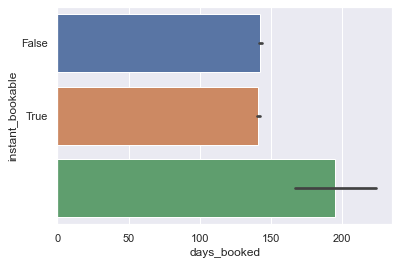

In [52]:

x,y = "instant_bookable", "days_booked"
sns.barplot(x=y, y=x, data=data)

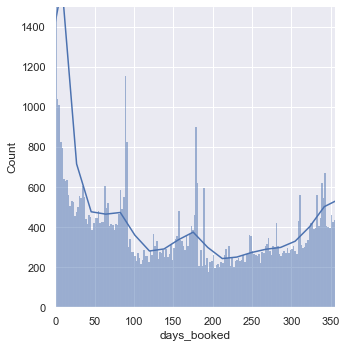

In [54]:
x = "days_booked"
sns.displot(data=data, x=x,binwidth=2,kde=True)
plt.ylim(0, 1500)
plt.xlim(0, 356)
 
plt.show()
